## Decision Trees - Introduction using the Iris dataset

For this example we will use the infamous "iris" dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set).
A visualization of its first two dimensions, as well as its top three principal components can be found here: http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py

(Based on code examples from Google Developer Machine Learning Series)




In [1]:
# Import important libraries to use in the machine learning process. 

## For any libraries not automatically loaded (e.g. pydotplus and graphviz), you may install them using the command "pip install xyz"

from sklearn import datasets #Import pool of datasets 
from sklearn.model_selection import train_test_split # Used to split the dataset effeciently
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO
# import graphviz #Used for visualization of the tree 
import pydotplus
# import pydot
from PIL import Image


### Loading the dataset and preparing for training

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

#### Features:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

#### Target Classes:

Iris Setosa --> 0 <br>
Iris Versicolour --> 1 <br>
Iris Virginica --> 2 <br>



In [2]:
# Loading the IRIS dataset which consist of 3 types of irises. This dataset comes with the sklearn distribution
iris = datasets.load_iris()

print('Total no of observations:',len(iris.target))
print('Feature names:',iris.feature_names)

#display first 10 rows from feature data
print('Data(first 10):',iris.data[0:10])




Total no of observations: 150
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data(first 10): [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [3]:
print('Target names:',iris.target_names)

# Display first 10 rows from target data
print('Target(first 10):',iris.target[:10])


Target names: ['setosa' 'versicolor' 'virginica']
Target(first 10): [0 0 0 0 0 0 0 0 0 0]


We need to tell our program which part of the dataset is the observation (i.e. attributes) and which part is the target variable. 

In [4]:
# Assigning data and target to variables x and y.
x = iris.data
y = iris.target

For training the machine we need to select some part of the dataset and feed it into our model. This training dataset is really important as it trains our model to predict the right class. A trained model is then tested using the Testing dataset.

To begin with,  the prefered train:test set splitting ratio is 70:30 or 80:20. (70% entries for training and 30% for testing performance of the model.) 


In [5]:
# Splitting the data into train and test set using a module of python
# test_size is 30% dataset and remaining 70% is used for training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)

# Dimensions of each
print('\n x_train',x_train.shape, '\n y_train', y_train.shape, '\n x_test',x_test.shape, '\n y_test', y_test.shape)


print('No of observations in training set:', len(x_train))
print('No of observations in testing set:', len(x_test))



 x_train (105, 4) 
 y_train (105,) 
 x_test (45, 4) 
 y_test (45,)
No of observations in training set: 105
No of observations in testing set: 45


### Training the model

We will now use the DecisionTreeClassifier function to train our model. We first need to define the paramenters (e.g. which purity criterion to use, what is the maximum depth of the tree, etc.). Details on the various parameters can be found here: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [6]:
# Declaring a Decision Tree Classifier using module 'tree'
# max_depth is the maximum depth of our tree model. Setting it to "none" lets the tree grow (thus no pre-pruning is applied). 
#We can configure the tree using other parameters to. 

dtc = tree.DecisionTreeClassifier(max_depth= 10)

#Call this to see the default values for all parameters
dtc 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
# Training the model. 
# We "fit" the tree to our training data
dtc.fit(x_train,y_train)

print('Model trained') 

# Now predicting for the test set.
y_predictions = dtc.predict(x_test)

# We can see that the results are stored in the form of array.
y_predictions

Model trained


array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0])

In [8]:
# Accuracy is calculated by comparing the true results with the predicted results.
# Accuracy = True prediction in test / Total no of observations in test


print('Accuracy for given train:test split = ',accuracy_score(y_test, y_predictions))



Accuracy for given train:test split =  0.955555555556


In [9]:

### What would happen if we calculated accuracy for the training set?
### Enter your code here...
y_tr_predictions = dtc.predict(x_train)

print('Accuracy for given train:test split = ',accuracy_score(y_train, y_tr_predictions))

### What do you see? Why does this happen?


Accuracy for given train:test split =  1.0


## Decision Tree Visualization
The tree visualization shows how the algorithms thinks when it is trying to predict. It asks questions starting from the root to the leaf of the tree. Based on the answers( True or False) to those question, the final category or the next question is decided. 

When we allow more depth to the tree, we actually allow our model to as more no of questions to predict the category.

In [10]:
# Saving decision tree in DOT format for creating a graph.
# DOT is a graph description language. DOT graphs are typically files with the file extension gv or dot. 

dot_data = StringIO()
tree.export_graphviz(dtc,
                     out_file = dot_data,
                     feature_names = iris.feature_names,
                     class_names= iris.target_names, 
                     filled = True,
                     rounded = True,
                     impurity = False
                    )

In [11]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_jpg('iris.jpg')  #save graph as image
print('File saved as a JPG.')

File saved as a JPG.


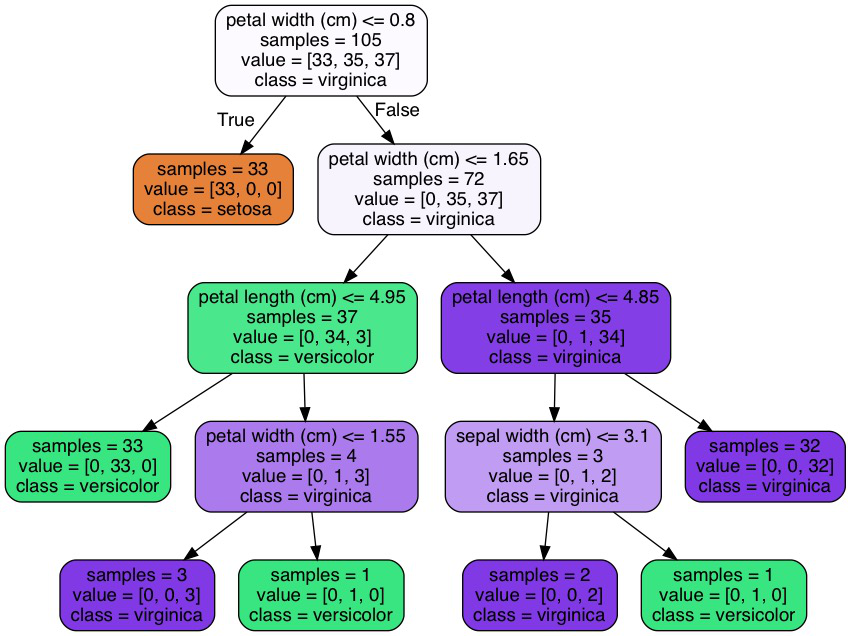

In [12]:
img = Image.open('iris.jpg') # Open the saved image
img

#### Feature Importance in trees
Finally, let's get some insights on the tree by looking closer on the different features and their importance in the prediction process.

"Feature importance" summary rates how important each feature is for the decision a tree makes. It's a number between 0 and 1 for each feature, where 0 means "not used at all" and 1 means "perfectly predicts the target". The feature importances always sum to 1.

In [13]:
print("Feature importances:\n{}".format(dtc.feature_importances_))

Feature importances:
[ 0.          0.01906837  0.06611535  0.91481627]


## Links for reference:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
